# Каковы шансы получить визу Германии?
>В ноутбуке __[visa_parsing.ipynp](https://github.com/MustDie-green/AWD-forum-visa->parsing/blob/main/visa_parsing.ipynb)__ я спарсил данные с __[форума Винского](https://forum.awd.ru/viewtopic.php?>f=521&t=397637)__ и грубо категоризовал.  
>Здесь я их анализирую и пытаюсь понять как в 2022 году россиянам выдают немецкие шенгенские визы.

Перед анализом я проверил данные вручную, допрописал пропущенные значения и исправил несколько ошибок изначальной категоризации.
Здесь и дальше я много использую библиотеку dfply, которая переносит опыт R-программинга в Python. 
R — мой первый язык, так что не пугайтесь ;)

In [1]:
import pandas as pd
import seaborn as sns
from dfply import *
import matplotlib.pyplot as plt
import matplotlib as mpl

Берем доработанный вручную датасет. Поскольку принимать документы на немецкие турвизы стали с 15 июня 2022 года, фильтруем лишние строки.

In [2]:
df = pd.read_csv('done_data.csv')
df = (
    df >>
    mask((X.date.str.contains('2022')) & (X.date.str.contains('июн') |
                                          X.date.str.contains('июл') |
                                          X.date.str.contains('авг') ))
)
df

,message_number,date,city,visa_center,history,history_country,limit
31,34,03 июн 2022,Калининград,ВЦ визаметрик,Годовые и больше,Другие страны,Год и больше
32,35,10 июн 2022,Санкт-Петербург,ВЦ Визаметрик,Нет,Нет,Даты поездки
33,36,12 июн 2022,Москва,ВЦ визаметрик,Годовые и больше,Другие страны,Год и больше
34,37,15 июн 2022,Екатеринбург,Визовый центр,Годовые и больше,Германия в истории,Год и больше
35,38,21 июн 2022,Москва,ВЦ,Годовые и больше,Другие страны,Год и больше
...,...,...,...,...,...,...,...
148,152,31 авг 2022,Москва,ВЦ Visametric,Меньше полугода,Германия в истории,Год и больше
149,153,31 авг 2022,Москва,ВЦ Visametric,Годовые и больше,Германия в истории,Год и больше
150,154,31 авг 2022,Москва,Визаметрик,Годовые и больше,Другие страны,Год и больше
151,155,31 авг 2022,Калининград,ВЦ,Годовые и больше,Германия в истории,Год и больше


Строчки с датой до 15 июня отрежем вручную, чтобы не заморачиваться

In [3]:
df = df[4:]
df = df.reset_index(drop = True)
df

,message_number,date,city,visa_center,history,history_country,limit
0,38,21 июн 2022,Москва,ВЦ,Годовые и больше,Другие страны,Год и больше
1,39,23 июн 2022,Москва,ВЦ VISAMETRIC,Годовые и больше,Другие страны,Год и больше
2,40,24 июн 2022,Санкт-Петербург,ВЦ Визаметрик,Годовые и больше,Германия в истории,Полгода
3,41,24 июн 2022,Москва,ВЦ,Полугодовые,Другие страны,Меньше полугода
4,42,28 июн 2022,Москва,ВЦ,Годовые и больше,Германия в истории,Год и больше
...,...,...,...,...,...,...,...
113,152,31 авг 2022,Москва,ВЦ Visametric,Меньше полугода,Германия в истории,Год и больше
114,153,31 авг 2022,Москва,ВЦ Visametric,Годовые и больше,Германия в истории,Год и больше
115,154,31 авг 2022,Москва,Визаметрик,Годовые и больше,Другие страны,Год и больше
116,155,31 авг 2022,Калининград,ВЦ,Годовые и больше,Германия в истории,Год и больше


In [4]:
df['history'] = pd.Categorical(df["history"], ['Годовые и больше', 'Полугодовые', 'Меньше полугода', 
                                      'Даты поездки', 'Нет', 'Не понять'])
df['limit'] = pd.Categorical(df["limit"], ['Год и больше', 'Полгода', 'Меньше полугода', 
                                      'Даты поездки', 'Отказ'])
df['history_country'] = pd.Categorical(df['history_country'])

Готовимся рисовать графику

In [5]:
plt.style.use('ggplot')
colors = sns.color_palette('Dark2')
mpl.rcParams['figure.dpi'] = 110

## Как выдают визы с хорошей визовой историей  
«Хорошая» — у человека были визы на год и больше

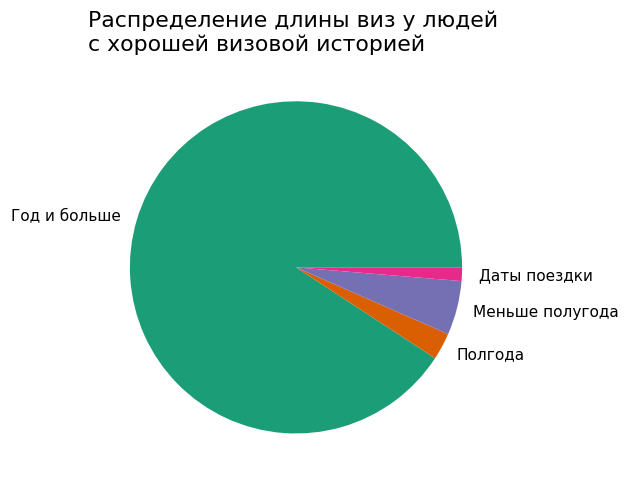

In [6]:
temp = (df >>
        group_by(X.history, X.limit) >>
        summarize(count = n(X.limit)) >>
        mask(X.history == 'Годовые и больше'))


plt.figure(figsize=(10, 5))
plt.pie(data = temp, x = 'count', labels = 'limit', colors = colors)
plt.title('Распределение длины виз у людей\nc хорошей визовой историей', loc = 'left') 
plt.show()

Сразу видно, что людей с хорошей визовой историей немцы редко обижают  
Ньюанс — количество людей в секторе «год и больше» тут огромное, а во всех остальных секторах людей очень мало.  
Если строить столбчатый график, то это будет выглядеть вот так — зеленый столбик уходит далеко вверх

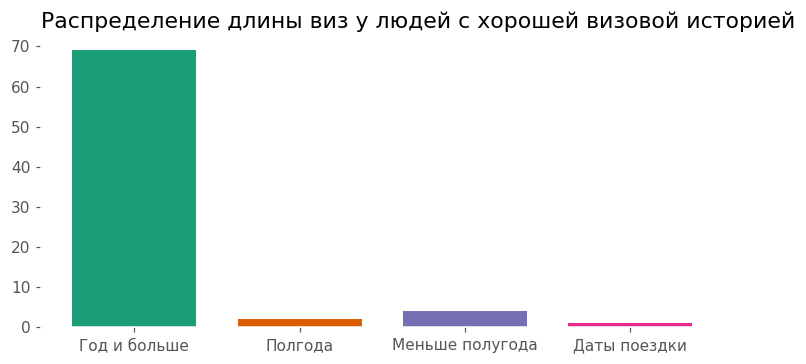

In [7]:
temp = (df >>
        group_by(X.history, X.limit) >>
        summarize(count = n(X.limit)) >>
        mask(X.history == 'Годовые и больше'))

plt.figure(figsize=(8, 3.5))
plt.axes().set_facecolor('white')
plt.bar(data = temp, height = 'count', x = 'limit', color = colors, width = .75)
plt.title('Распределение длины виз у людей с хорошей визовой историей',
     loc = 'left')
plt.show()

Возможно, все дело в том, что такие длинные визы получают те, у кого уже были немецкие визы?  
Давайте проверим

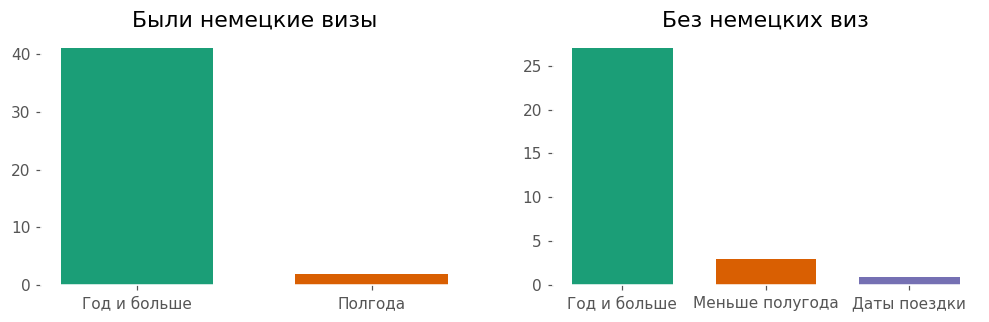

In [8]:
temp = (df >>
        mask((X.history == 'Годовые и больше') & (X.history_country == 'Германия в истории')) >>
        group_by(X.limit, X.history_country) >>
        summarize(count = n(X.limit))
       )

temp1 = (df >>
         mask((X.history == 'Годовые и больше') & (X.history_country == 'Другие страны')) >>
         group_by(X.limit, X.history_country) >>
         summarize(count = n(X.limit))
        )

figure, axis = plt.subplots(1, 2, figsize=(11, 3))
axis[0].set_facecolor('white')
axis[1].set_facecolor('white')

axis[0].bar(data = temp, height = 'count', x = 'limit', color = colors, width = .65)
axis[0].set_title('Были немецкие визы')

axis[1].bar(data = temp1, height = 'count', x = 'limit', color = colors, width = .7)
axis[1].set_title('Без немецких виз')

plt.show()

В общем, вроде бы немцы не обижают людей с хорошей визовой историей, даже если у них раньше не было немецких виз.  
Важное уточнение — я сложил в одну кучу людей с визами на год, два и больше, потому что:  
- У меня не было виз длиннее полугода для меня это все выглядит одинаково много;
- Так было намного проще автоматизированно парсить длину визы.

## Как выдают визы, если были полугодовые

Сначала общее распределение

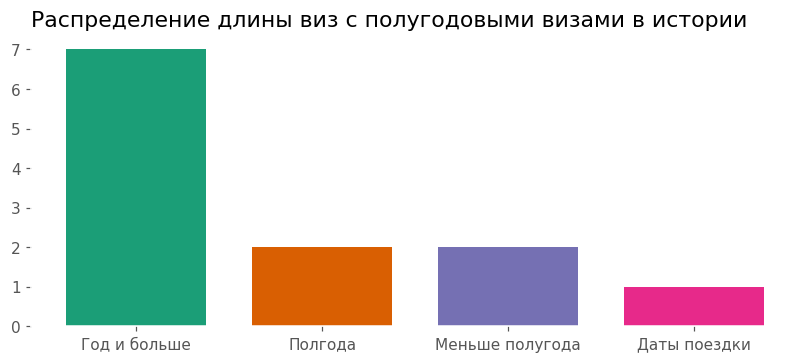

In [9]:
temp = (df >>
        mask(X.history == 'Полугодовые') >>
        group_by(X.history, X.limit) >>
        summarize(count = n(X.limit))
       )

plt.figure(figsize=(9, 3.5))
plt.axes().set_facecolor('white')
plt.bar(data = temp, height = 'count', x = 'limit', color = colors, width = .75)
plt.title('Распределение длины виз с полугодовыми визами в истории',
     loc = 'left')
plt.show()

Сразу видно две вещи:  
- Людей в этой категории мало;
- Тут тоже вроде бы не обижают — чаще всего дают на год и больше.

Строим отдельные графики для людей с немецкой историей и без

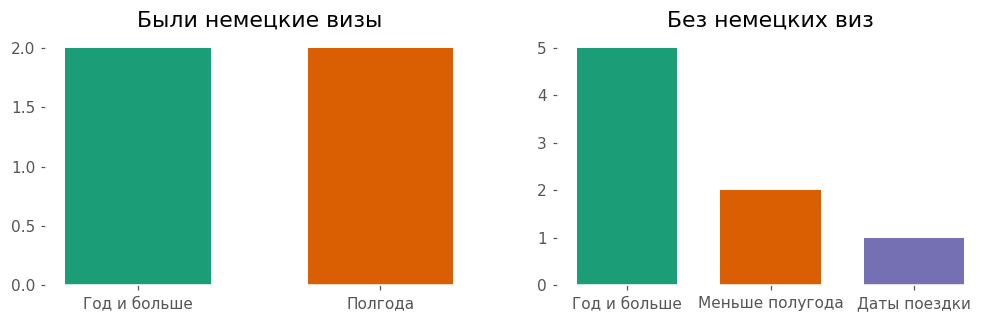

In [10]:
temp = (df >>
        mask((X.history == 'Полугодовые') & (X.history_country == 'Германия в истории')) >>
        group_by(X.limit, X.history_country) >>
        summarize(count = n(X.limit))
       )

temp1 = (df >>
         mask((X.history == 'Полугодовые') & (X.history_country == 'Другие страны')) >>
         group_by(X.limit, X.history_country) >>
         summarize(count = n(X.limit))
        )

figure, axis = plt.subplots(1, 2, figsize=(11, 3))
axis[0].set_facecolor('white')
axis[1].set_facecolor('white')

axis[0].bar(data = temp, height = 'count', x = 'limit', color = colors, width = .6)
axis[0].set_title('Были немецкие визы')

axis[1].bar(data = temp1, height = 'count', x = 'limit', color = colors, width = .7)
axis[1].set_title('Без немецких виз')

plt.show()

Оказалось, что людей с полугодовыми визами и Германией в истории очень мало, так что искать скрытый смысл в графике не стоит.  
Людей без немецкой визовой истории и тут вроде бы не обижают.

## Как выдают визы, если раньше были только короткие

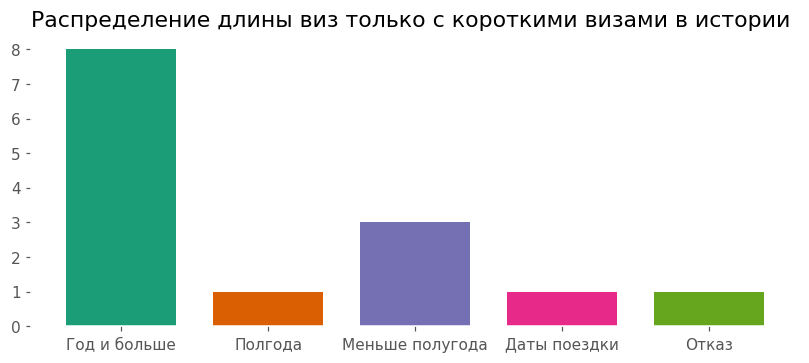

In [11]:
temp = (df >>
        mask((X.history == 'Меньше полугода') | ( X.history == 'Даты поездки')) >>
        group_by(X.limit) >>
        summarize(count = n(X.limit))      
       )


plt.figure(figsize=(9, 3.5))
plt.axes().set_facecolor('white')
plt.bar(data = temp, height = 'count', x = 'limit', color = colors, width = .75)
plt.title('Распределение длины виз только с короткими визами в истории',
     loc = 'left')
plt.show()

Я объединил людей с визами меньше полугода и визами под даты поездки, потому что эти группы в отдельности были слишком малы.  
Здесь тоже превалирует категория «Год и больше». А что если они были не немецкие?

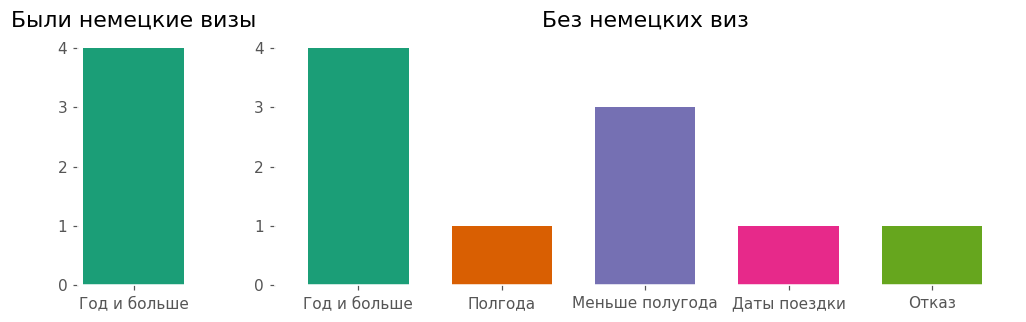

In [12]:
temp = (df >>
        mask(((X.history == 'Меньше полугода') | ( X.history == 'Даты поездки'))
             & (X.history_country == 'Германия в истории')) >>
        group_by(X.limit, X.history_country) >>
        summarize(count = n(X.limit))
       )


temp1 = (df >>
         mask(((X.history == 'Меньше полугода') | ( X.history == 'Даты поездки'))
             & (X.history_country == 'Другие страны')) >>
         group_by(X.limit, X.history_country) >>
         summarize(count = n(X.limit))
        )


figure, axis = plt.subplots(1, 2, figsize=(11, 3), 
                            gridspec_kw={'width_ratios': [0.3, 2]})
axis[0].set_facecolor('white')
axis[1].set_facecolor('white')

axis[0].bar(data = temp, height = 'count', x = 'limit', color = colors)
axis[0].set_title('Были немецкие визы')

axis[1].bar(data = temp1, height = 'count', x = 'limit', color = colors, width = .7)
axis[1].set_title('Без немецких виз')

plt.show()

Так, ну у людей с немецкой историей все хорошо, хоть таких людей и очень мало.   
Для людей без немецкой истории картинка интереснее. Больше всего годовых+ и полгода-, закрадывается подозрение, что годовые+ все-таки выдают тем, у кого были визы на 30-90 дней, а полгода- дают тем, у кого под даты поездки.

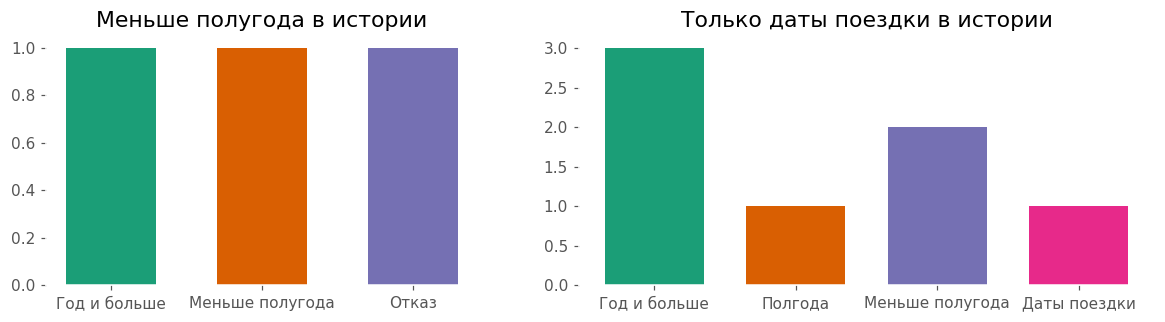

In [13]:
temp = (df >>
         mask((X.history == 'Меньше полугода') &
              (X.history_country == 'Другие страны')) >>
         group_by(X.limit, X.history_country) >>
         summarize(count = n(X.limit))
        )

temp1 = (df >>
         mask((X.history == 'Даты поездки') &
              (X.history_country == 'Другие страны')) >>
         group_by(X.limit, X.history_country) >>
         summarize(count = n(X.limit))
        )


figure, axis = plt.subplots(1, 2, figsize=(13, 3),
                           gridspec_kw={'width_ratios': [1.5, 2]})
axis[0].set_facecolor('white')
axis[1].set_facecolor('white')

axis[0].bar(data = temp, height = 'count', x = 'limit', color = colors, width = .6)
axis[0].set_title('Меньше полугода в истории')

axis[1].bar(data = temp1, height = 'count', x = 'limit', color = colors, width = .7)
axis[1].set_title('Только даты поездки в истории')

plt.show()

Гипотеза не подтвердилась, визы на год + и полгода- превалируют именно в группе с «датами поездки». Людей с полугодовыми визами других стран оказалось просто очень мало, поэтому в левом графике снова не стоит пытаться искать какой-то смысл.

### Что с людьми без шенгенских виз?

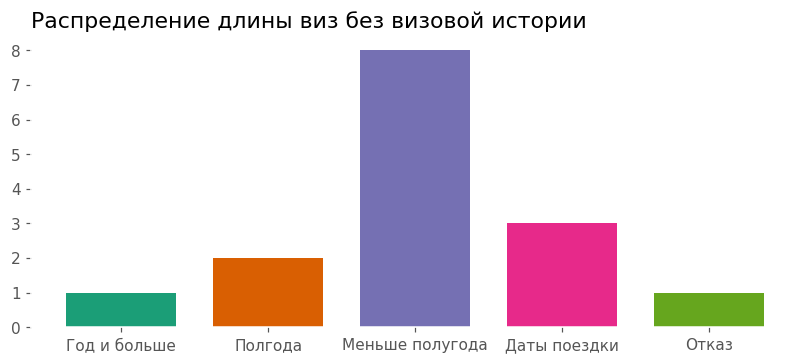

In [14]:
temp = (df >>
        mask((X.history == 'Нет')) >>
        group_by(X.limit) >>
        summarize(count = n(X.limit))      
       )


plt.figure(figsize=(9, 3.5))
plt.axes().set_facecolor('white')
plt.bar(data = temp, height = 'count', x = 'limit', color = colors, width = .75)
plt.title('Распределение длины виз без визовой истории',
     loc = 'left')
plt.show()

Ого, распределение отдаленно напоминает нормальное! <br>
В общем, для людей без визовой истории тоже не все потеряно, хотя и не супер.     
Чаще всего визы дают на 30-90 дней, отказов мало, виз под даты поездки тоже мало.

## Заключение:

### Самое главное:
> «Исследование» проводилось на мизерной и очень неуравновешенной выборке — подавляющее большинство людей уже имели визы на год+ и получали визы год+, остальных было в несколько раз меньше. Насколько это репрезентативно, никто не знает. Кроме того, люди, которые сами пишут что-то на форуме путешественников, уже смещенная выборка, большинство наверняка просто получают свои визы или отказы, и не думают писать об этом на форуме.  
> Так что выводы стоит делать аккуратно. Перед «исследованием» не стояло задачи узнать реальное положение дел. Я хотел сделать чуть более методологичную версию разбора ответов на форуме, потому что знаю, что на них ориентируются люди. И я в том числе.
> 100% визы зависят еще от кучи факторов, которые либо не узнать из сообщения на форуме, либо сложно автоматизированно спарсить.
### Выводы:
- Людям с хорошей визовой историей, в том числе не немецкой, неплохо дают немецкие визы;
- Отказов мало в любых категориях;
- Люди с короткой визовой историей или без нее тоже могут надеяться получить мультивизу хотя бы на 30-90, но никто ничего не обещает.